# How to get rich from Seattle Airbnb

![airbnb.jpg](attachment:airbnb.jpg)

## Business Understanding

i am from lover of Airbnb, for its many countries and places, it gives you the feeling that you 
are at home because you will serve yourself not like hotel، usually it cheaper more than hotel.
here some question that will help customer like me or maybe merchants.

* What are the different prices for the various neighborhoods of Seattle?
* How does seasonality affect prices?
* What other factors affet flat prices ?


## Understand Data

To get started, let's import our libraries.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import missingno as msno

import csv


import matplotlib.style as style
import plotly.figure_factory as ff
import plotly.graph_objects as go



In [4]:
listings = pd.read_csv('listings.csv')
calendardf = pd.read_csv('calendar.csv')
reviews = pd.read_csv('reviews.csv', header = None, delimiter="\t", quoting=csv.QUOTE_NONE, encoding='utf-8')
 

In [5]:
listings.head(3)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15


In [6]:
calendardf.head(3)

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN


In [7]:
reviews.head(3)

,0
0,"listing_id,id,date,reviewer_id,reviewer_name,c..."
1,"7202016,38917982,2015-07-19,28943674,Bianca,Cu..."
2,"7202016,39087409,2015-07-20,32440555,Frank,""Ke..."


In [8]:
listings.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month
count,3.818000e+03,3.818000e+03,3.818000e+03,3816.000000,3816.000000,3818.000000,3818.000000,3818.000000,3802.000000,3812.000000,...,3171.000000,3160.000000,3165.000000,3160.000000,3167.000000,3163.000000,3162.000000,0.0,3818.000000,3191.000000
mean,5.550111e+06,2.016010e+13,1.578556e+07,7.157757,7.157757,47.628961,-122.333103,3.349398,1.259469,1.307712,...,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245,NaN,2.946307,2.078919
std,2.962660e+06,0.000000e+00,1.458382e+07,28.628149,28.628149,0.043052,0.031745,1.977599,0.590369,0.883395,...,6.606083,0.698031,0.797274,0.595499,0.568211,0.629053,0.750259,NaN,5.893029,1.822348
min,3.335000e+03,2.016010e+13,4.193000e+03,1.000000,1.000000,47.505088,-122.417219,1.000000,0.000000,0.000000,...,20.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000,NaN,1.000000,0.020000
25%,3.258256e+06,2.016010e+13,3.275204e+06,1.000000,1.000000,47.609418,-122.354320,2.000000,1.000000,1.000000,...,93.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,NaN,1.000000,0.695000
50%,6.118244e+06,2.016010e+13,1.055814e+07,1.000000,1.000000,47.623601,-122.328874,3.000000,1.000000,1.000000,...,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,1.540000
75%,8.035127e+06,2.016010e+13,2.590309e+07,3.000000,3.000000,47.662694,-122.310800,4.000000,1.000000,2.000000,...,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,2.000000,3.000000
max,1.034016e+07,2.016010e+13,5.320861e+07,502.000000,502.000000,47.733358,-122.240607,16.000000,8.000000,7.000000,...,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,37.000000,12.150000


 we will see if there is any miss data or not

In [9]:
listings.shape

(3818, 92)

In [10]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

In [11]:
calendardf.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 675983 entries, 0 to 675982
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   listing_id  675983 non-null  int64 
 1   date        675983 non-null  object
 2   available   675982 non-null  object
 3   price       454321 non-null  object
dtypes: int64(1), object(3)
memory usage: 20.6+ MB


## Prepare Data

clean data set from missing values

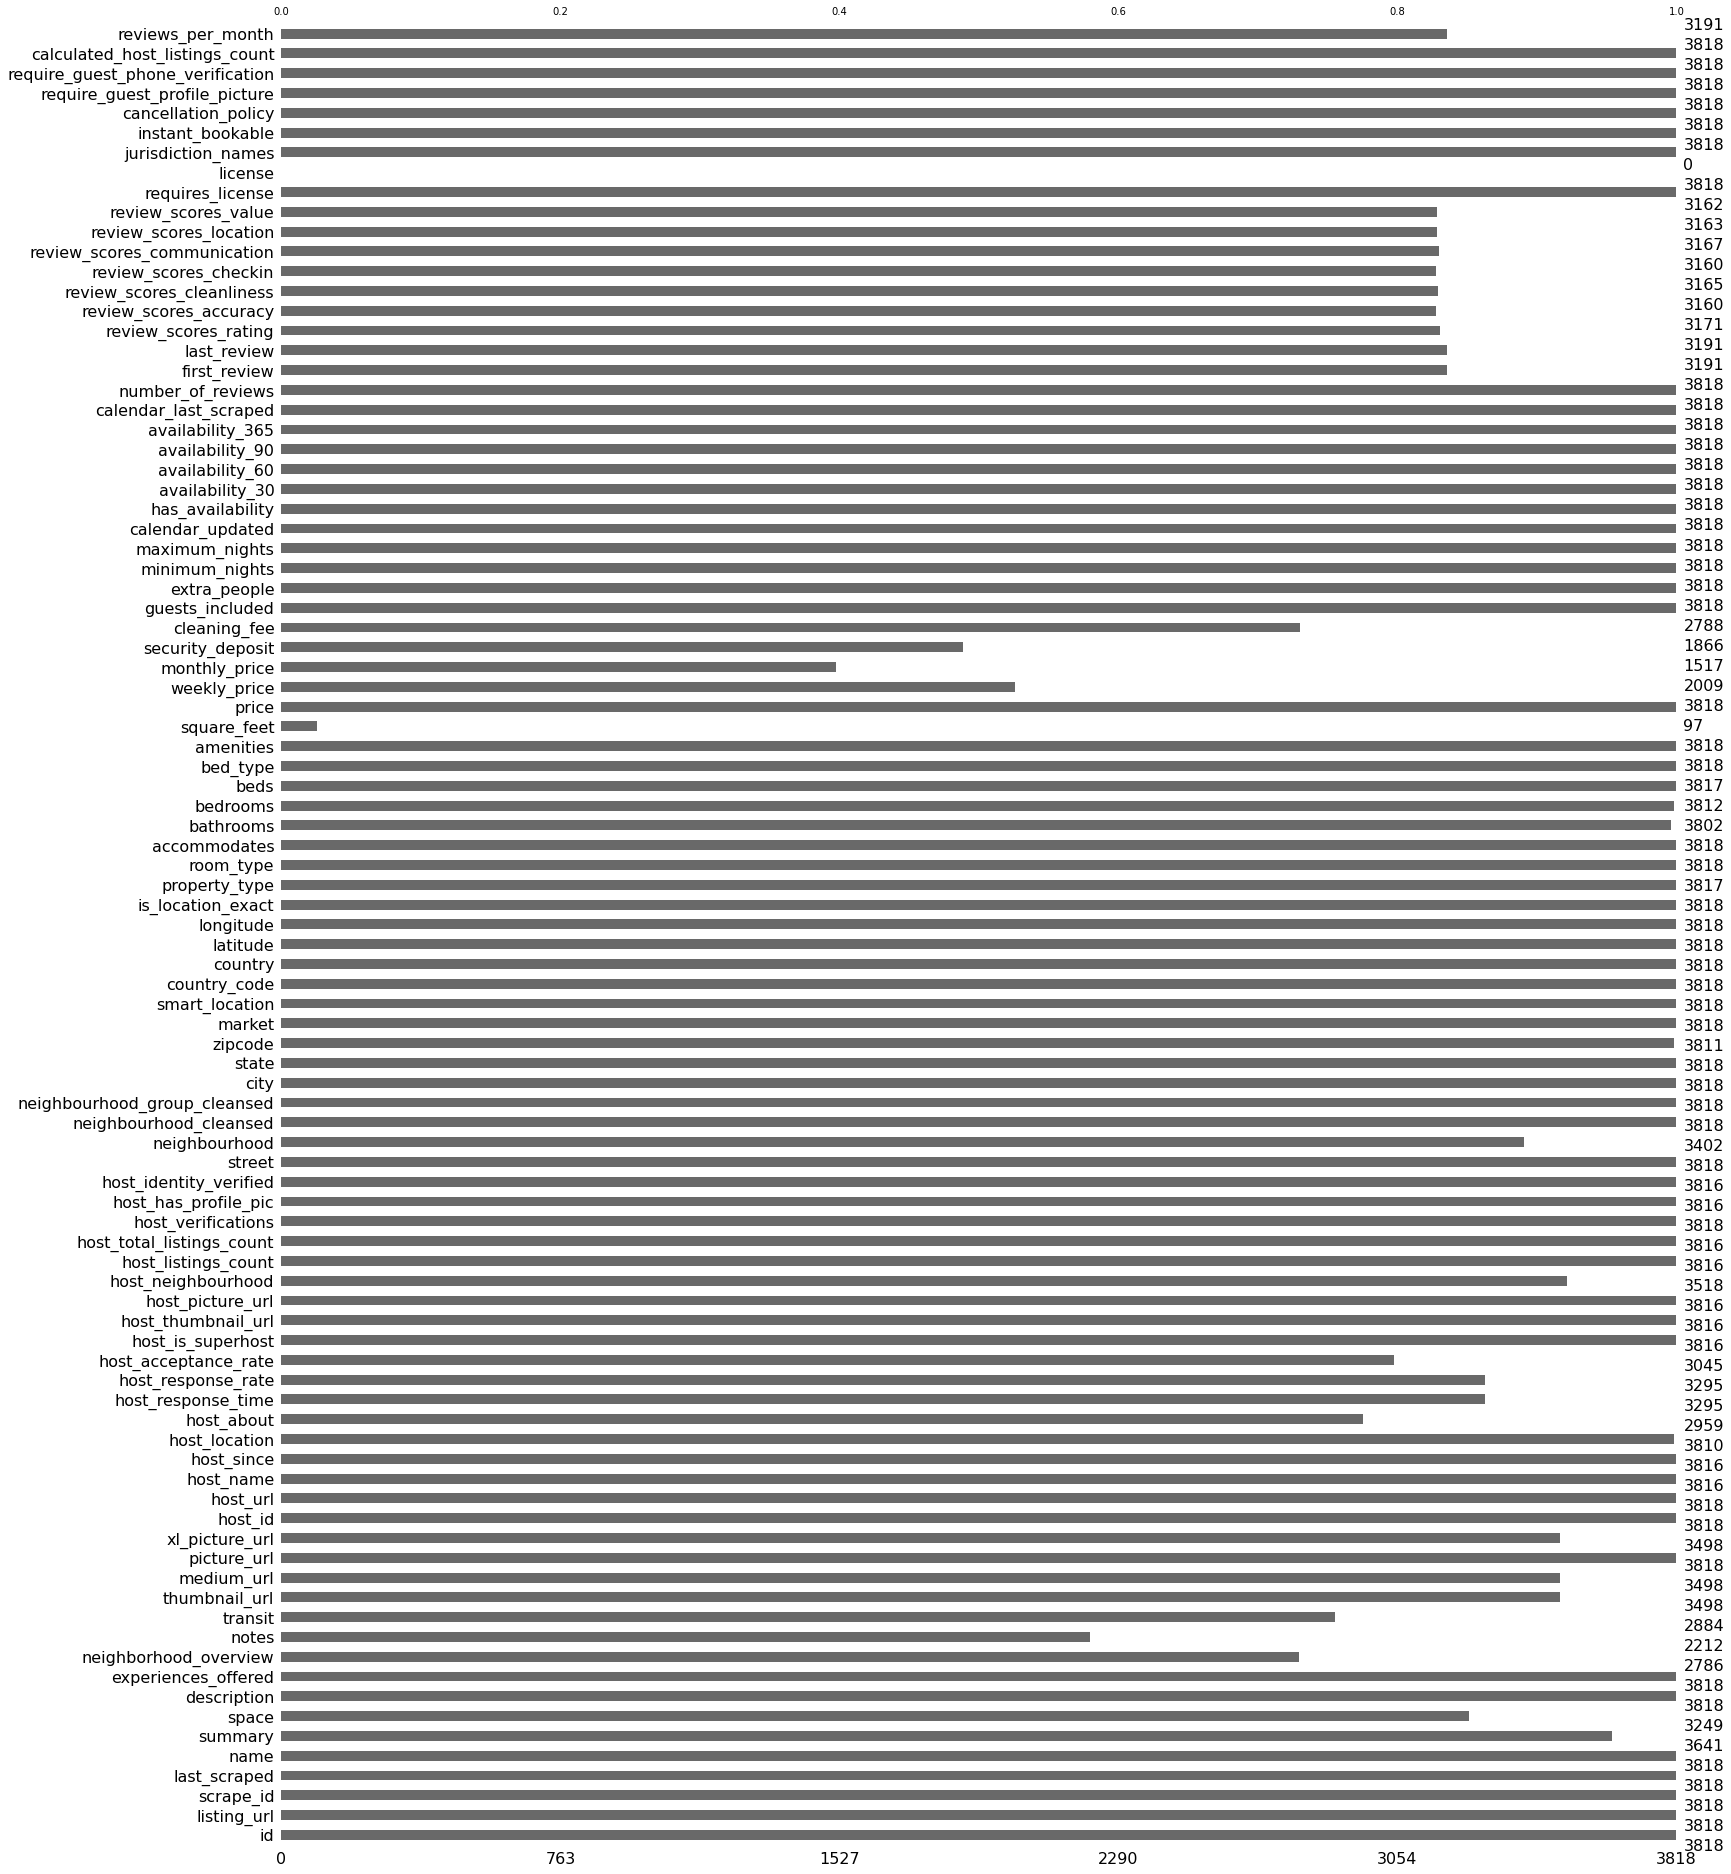

In [12]:
msno.bar(listings)

From the above plot we see that there is no data available for licence and square feet and also we have a lot of missing data for monthly price, weekly price and security deposit. We will not use this data as it will skew our findings. Other variables like number of Beds, Bedrooms will be imputed using mode in the next steps bellow.

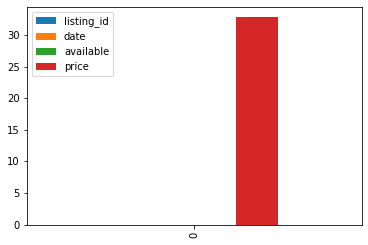

In [13]:
calendar_missing = pd.DataFrame([calendardf.isnull().mean()*100])
calendar_missing.plot.bar()

There is 34% of data missing for the price column

In [14]:
 #merge datasets so we will change id in listings data set to id 
listings = listings.rename(index=str, columns={"id": "listing_id"})
df = pd.merge(calendardf, listings, on = 'listing_id')

In [15]:
#drop columns that no need it for analysis
columns_to_drop = ['available', 'host_id','host_location',
                   'host_acceptance_rate','host_neighbourhood',
                   'host_total_listings_count', 'weekly_price', 'monthly_price',
                   'security_deposit', 'cleaning_fee', 'calendar_updated',
                   'listing_url','last_scraped' ,'scrape_id', 'name', 'summary',
                   'space', 'description',
                   'experiences_offered', 'street', 'neighbourhood',
                   'neighbourhood_cleansed', 'zipcode',
                   'neighborhood_overview', 'notes', 'transit', 'thumbnail_url',
                   'medium_url', 'picture_url',
                   'xl_picture_url', 'host_url', 'host_name', 'host_about',
                   'host_thumbnail_url', 'host_picture_url',
                   'city', 'state', 'market', 'smart_location', 'country_code',
                   'country', 'latitude', 'longitude',
                   'is_location_exact', 'square_feet', 'has_availability',
                   'availability_30',
                   'availability_60', 'availability_90', 'availability_365',
                   'calendar_last_scraped','host_is_superhost',
                  'first_review', 'last_review', 'requires_license', 'license',
                   'jurisdiction_names', 'price_y','host_identity_verified','host_since',
                   'host_response_time','host_has_profile_pic','property_type',
                  'reviews_per_month']
    
df = df.drop(columns = columns_to_drop)

In [16]:
#Remove rows where price_x == nan because 34% only has missing values so this not effect of result 
df = df.dropna(subset=['price_x'])

In [17]:
#fill missing values with mean value for host_listings_count
df['host_listings_count'].fillna(df['host_listings_count'].mean(),
                                   inplace = True)

In [18]:
#fill in missing values for bathrooms, bedrooms and beds with mode
df['bathrooms'] = df['bathrooms'].fillna(df['bathrooms'].mode()[0])
df['bedrooms'] = df['bedrooms'].fillna(df['bedrooms'].mode()[0])
df['beds'] = df['beds'].fillna(df['beds'].mode()[0])

In [19]:
 #fill missing values for review scores columns
review_scores_columns = ['review_scores_rating', 'review_scores_accuracy',
                           'review_scores_cleanliness','review_scores_checkin',
                           'review_scores_communication', 
                           'review_scores_location', 'review_scores_value']
for column in review_scores_columns:
        df[column].fillna(df[column].mean(), inplace = True)

In [20]:
#convert price to number and drop the price_x column
df['price'] = df['price_x'].astype(str)
df['price'] = df['price'].str.replace("[$, ]", "").astype("float")
df = df.drop(columns = ['price_x'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until


In [21]:
#convert host_response_rate into number and fill in missing values, drop the original column
df['host_response_rate_num'] = df['host_response_rate'].astype(str)
df['host_response_rate_num'] = df['host_response_rate_num'].str.replace("%", "").astype("float")
df['host_response_rate_num'].fillna(df['host_response_rate_num'].mean(), inplace = True)

In [22]:
df['host_response_rate_buckets'] = pd.qcut(df['host_response_rate_num'], 5, labels=False, duplicates = 'drop')
    
df = df.drop(columns = ['host_response_rate', 'host_response_rate_num'])
    
#fill missing values with mean value for host_listings_count
df['host_listings_count'].fillna(df['host_listings_count'].mean(), inplace = True)


In [24]:
#Get month from date represented as a string
df['month'] = df.apply(lambda row: int(row['date'].split('-')[1]),axis=1)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 454321 entries, 0 to 675981
Data columns (total 32 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   listing_id                        454321 non-null  int64  
 1   date                              454321 non-null  object 
 2   host_listings_count               454321 non-null  float64
 3   host_verifications                454321 non-null  object 
 4   neighbourhood_group_cleansed      454321 non-null  object 
 5   room_type                         454321 non-null  object 
 6   accommodates                      454321 non-null  int64  
 7   bathrooms                         454321 non-null  float64
 8   bedrooms                          454321 non-null  float64
 9   beds                              454321 non-null  float64
 10  bed_type                          454321 non-null  object 
 11  amenities                         454321 non-null  o

# First Question: How do the prices of flats differ for various neighbourhoods in Seattle?

In [26]:
#Get a dataframe of price and neibgourhood
Price_by_Neighbourhoud_df = pd.DataFrame(
    df.groupby('neighbourhood_group_cleansed')
    ['price'].mean().sort_values(ascending=False).reset_index())

fig = go.Figure(
data=[go.Bar(
    y=Price_by_Neighbourhoud_df['price'], 
    x=Price_by_Neighbourhoud_df['neighbourhood_group_cleansed'])],
    layout_title_text="Price by Neigbhbourhood in Seattle"
)
fig.show()

Here we will see there are neighborhoods most expensive more then other like in this graph Magnolia is very expensive then other neighborhoods, 

In [27]:
df.head(10)

,listing_id,date,host_listings_count,host_verifications,neighbourhood_group_cleansed,room_type,accommodates,bathrooms,bedrooms,beds,...,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,price,host_response_rate_buckets,month
0,241032,2016-01-04,3.0,"['email', 'phone', 'reviews', 'kba']",Queen Anne,Entire home/apt,4,1.0,1.0,1.0,...,9.0,10.0,f,moderate,f,f,2,85.0,1,1
1,241032,2016-01-05,3.0,"['email', 'phone', 'reviews', 'kba']",Queen Anne,Entire home/apt,4,1.0,1.0,1.0,...,9.0,10.0,f,moderate,f,f,2,85.0,1,1
9,241032,2016-01-13,3.0,"['email', 'phone', 'reviews', 'kba']",Queen Anne,Entire home/apt,4,1.0,1.0,1.0,...,9.0,10.0,f,moderate,f,f,2,85.0,1,1
10,241032,2016-01-14,3.0,"['email', 'phone', 'reviews', 'kba']",Queen Anne,Entire home/apt,4,1.0,1.0,1.0,...,9.0,10.0,f,moderate,f,f,2,85.0,1,1
14,241032,2016-01-18,3.0,"['email', 'phone', 'reviews', 'kba']",Queen Anne,Entire home/apt,4,1.0,1.0,1.0,...,9.0,10.0,f,moderate,f,f,2,85.0,1,1
15,241032,2016-01-19,3.0,"['email', 'phone', 'reviews', 'kba']",Queen Anne,Entire home/apt,4,1.0,1.0,1.0,...,9.0,10.0,f,moderate,f,f,2,85.0,1,1
16,241032,2016-01-20,3.0,"['email', 'phone', 'reviews', 'kba']",Queen Anne,Entire home/apt,4,1.0,1.0,1.0,...,9.0,10.0,f,moderate,f,f,2,85.0,1,1
20,241032,2016-01-24,3.0,"['email', 'phone', 'reviews', 'kba']",Queen Anne,Entire home/apt,4,1.0,1.0,1.0,...,9.0,10.0,f,moderate,f,f,2,85.0,1,1
21,241032,2016-01-25,3.0,"['email', 'phone', 'reviews', 'kba']",Queen Anne,Entire home/apt,4,1.0,1.0,1.0,...,9.0,10.0,f,moderate,f,f,2,85.0,1,1
22,241032,2016-01-26,3.0,"['email', 'phone', 'reviews', 'kba']",Queen Anne,Entire home/apt,4,1.0,1.0,1.0,...,9.0,10.0,f,moderate,f,f,2,85.0,1,1


# Question Two :  How do prices are affected by seasonality?

In [28]:
#find average price by month
average_price_by_month = pd.DataFrame(
    df.groupby(['month'])['price'].mean().reset_index())
#create figure in plotly
fig = go.Figure(
data=[go.Scatter(
    y=average_price_by_month['price'], 
    x=average_price_by_month['month'])],
    layout_title_text="Average Price by Month in Seattle"
)
fig.show()

From the above plot we see that the months of June July and August are the most expensive ones with a peak in average prices in July ,While in the first quarter of the year, prices are lower and gradually increase

# Question three :  What are the contributing factors to price ?

In [29]:
cols = ['accommodates','bathrooms','bedrooms','beds',
        'host_listings_count',
        'review_scores_rating', 'price']

corr = np.corrcoef(df[cols].values.T)
z_text = np.around(corr, decimals=2)

fig = ff.create_annotated_heatmap(z=corr,
                                  annotation_text=z_text,
                                  x=cols,
                                  y=cols,
                                  colorscale = 'Magma')
fig.show()

here we will see from the above plot there are strong strong relationship with number of beds bedrooms, bathrooms and price. so The most important factor affecting the price is the bed

# **result**


* In the result we can see there are many way to save mony as customer you can rent from Ballard or central area or you can travel in first quarter of the yaer in January ,February,March   .

* Or increase your source of income as a merchant put many of bed , build many room or bathroom . 